In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
#画像表示関数
def  display(data) :
    fig, ax = plt.subplots()
    ax.imshow(data, cmap='binary_r')
    plt.show() 

In [3]:

##
# @brief ハフ変換
# @param img 2値画像（0が背景それ以外がエッジ）
# @param rho Rho方向の刻み
# @param theta 角度方向の刻み(ラジアン)
# @return θ-ρ空間のヒストグラム
def hough_lines(img, rho, theta):
    y, x = np.where(img)
    hough = []
 
    #rhoの最大値は画像の対角
    rho_max = np.ceil(np.sqrt(img.shape[0] * img.shape[0] + img.shape[1] * img.shape[1]) / rho)
    rng = np.round(np.pi / theta)
 
    for i in np.arange(-rng, rng):
        rho2 = np.round((x * np.cos(i * theta) + y * np.sin(i * theta)) / rho)
        hist, _ = np.histogram(rho2, bins=np.arange(0, rho_max))
        hough.append(hist)
 
    return np.array(hough)
 
##
# @brief ピーク検出
# @param H θ-ρ空間のヒストグラム
# @param threshold 投票数の閾値
# @return ピーク位置でのθ-ρの値
def detectPeak(H, threshold):
    H[H < threshold] = 0
 
    peak = (H[1:-1, 1:-1] >= H[0:-2, 1:-1]) * (H[1:-1, 1:-1] >= H[2:, 1:-1]) * \
           (H[1:-1, 1:-1] >= H[1:-1, 0:-2]) * (H[1:-1, 1:-1] >= H[1:-1, 2:]) * \
           (H[1:-1, 1:-1] > 0)
 
    return np.array(np.where(peak)) + 1


In [4]:
 
thres = 50 # 検出閾値
rho = 0.5 # ρの分解能
theta = np.pi / 180 # θの分解能
 
img = cv2.imread("data/lines.bmp")[:, :, 1]
edges = cv2.Canny(img, 50, 150, apertureSize=3)

hough = hough_lines(edges, rho, theta)
peak = detectPeak(hough, thres)

# ピークでの投票数
bins = [hough[peak[0, i], peak[1, i]] for i in range(peak.shape[1])]

# 検証
#lines = cv2.HoughLines(edges, rho, theta, thres)

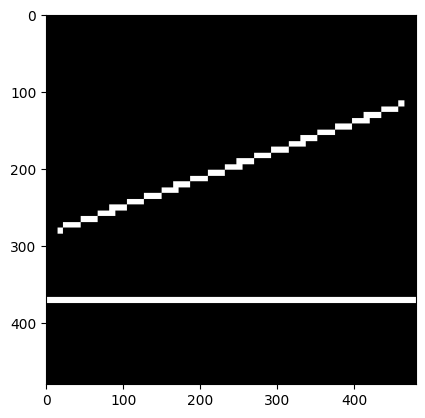

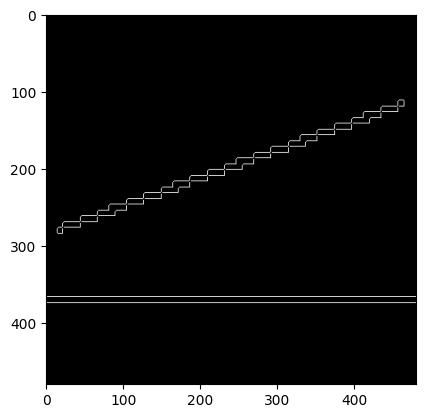

In [5]:
display(img)
display(edges)

In [6]:
bins

[np.int64(51), np.int64(53), np.int64(51), np.int64(480), np.int64(480)]